In [133]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score

In [2]:
df = pd.read_csv('heart_cleveland.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [4]:
X = df.drop('condition', axis = 1)
y = df['condition']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
y_pred = model_dt.predict(X_test)

In [8]:
def explain_model(model,  X_train, X_test, y_train, y_test, features = None):
    print('Test Results:')
    y_pred = model.predict(X_test)
    print(classification_report(y_pred, y_test))
    print(confusion_matrix(y_pred, y_test))
    print('Train Results:')
    y_pred_tr = model.predict(X_train)
    print(classification_report(y_pred_tr, y_train))
    print(confusion_matrix(y_pred_tr, y_train))
    print('------------------')
    print('------------------')
    plt.figure(figsize=(20, 10))
    plot_tree(model, 
              filled=True,
              feature_names = features,
              class_names=True,
              rounded=True,
              fontsize=10)
    plt.title("Visualization", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

Test Results:
              precision    recall  f1-score   support

           0       0.62      0.74      0.68        27
           1       0.75      0.64      0.69        33

    accuracy                           0.68        60
   macro avg       0.69      0.69      0.68        60
weighted avg       0.69      0.68      0.68        60

[[20  7]
 [12 21]]
Train Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       109

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237

[[128   0]
 [  0 109]]
------------------
------------------


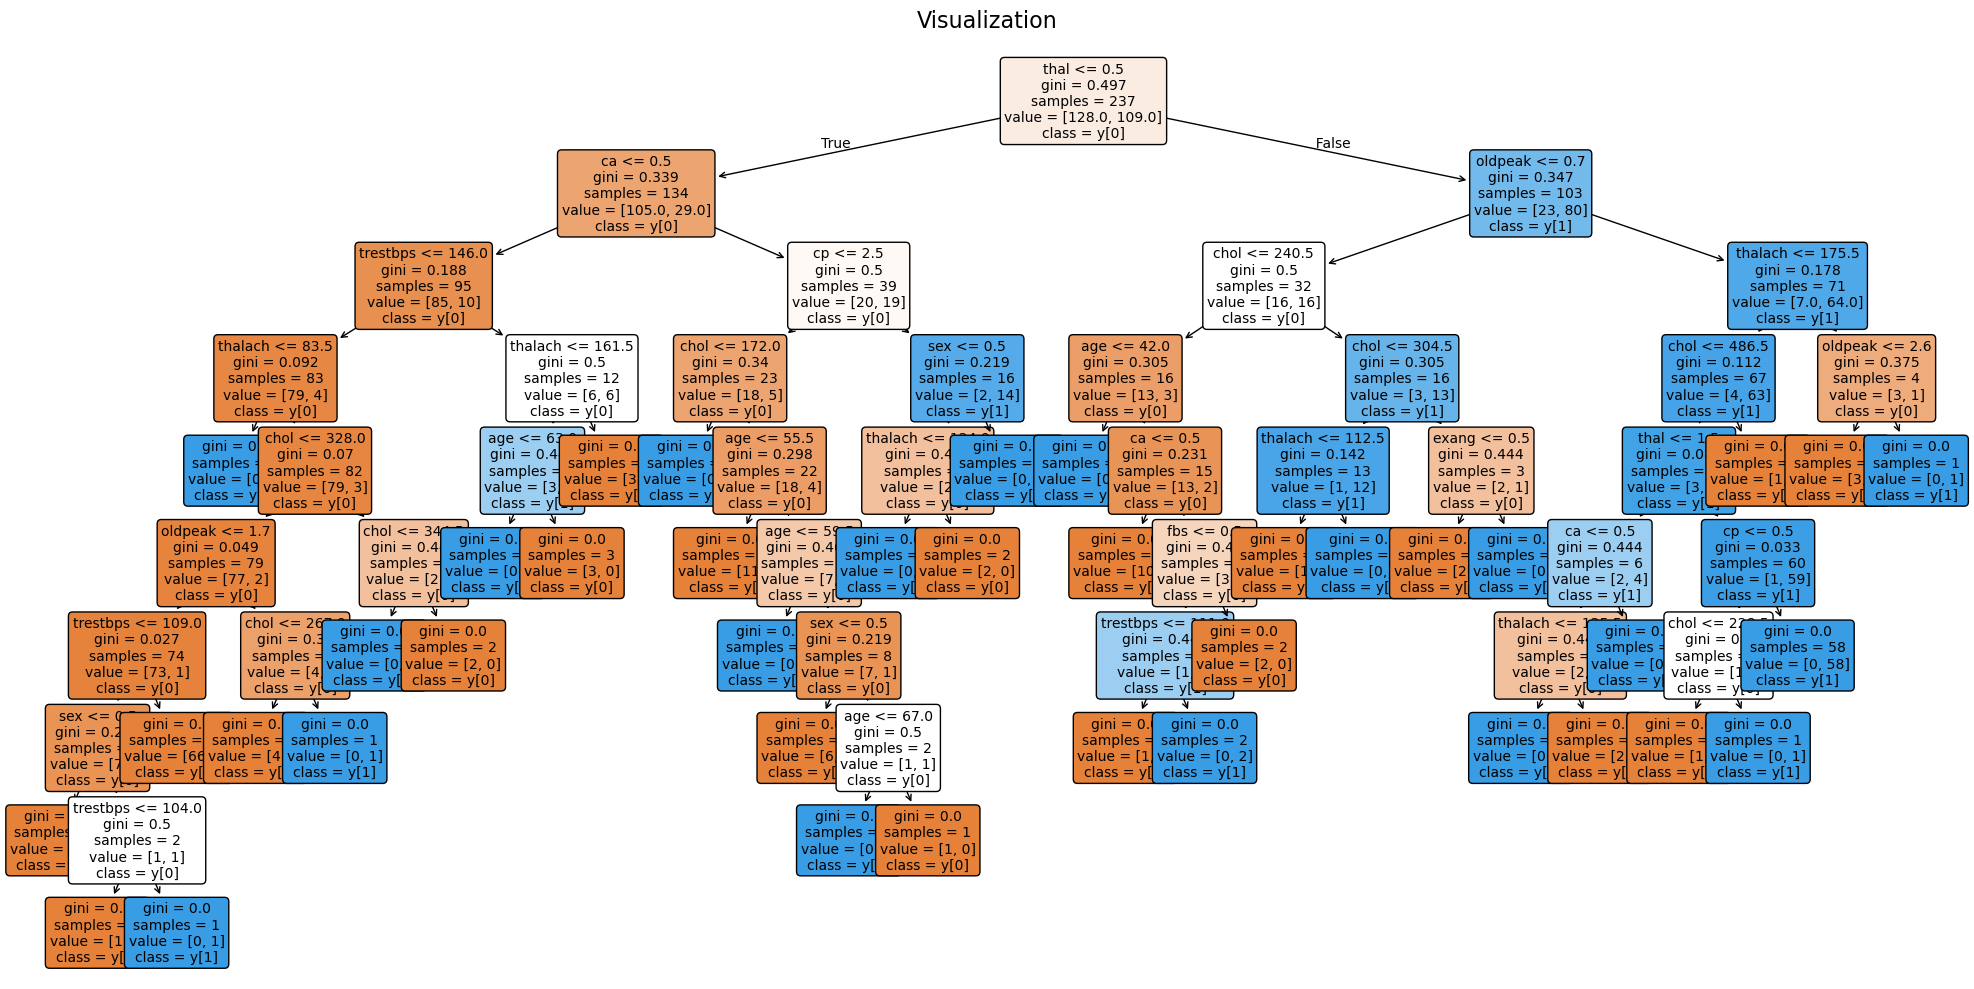

In [9]:
explain_model(model_dt, X_train, X_test, y_train, y_test, features = X_train.columns)

In [13]:
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 3, 5, 6, 7, 8, 12, 20],
    "min_samples_split": [2, 3, 4, 5, 10, 20],
    "min_samples_leaf": [1, 4, 5, 10, 15]
}

model = DecisionTreeClassifier()

gs = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="accuracy",         
    cv=5,
    n_jobs=-1,
    verbose=1
)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 5, 6, 7, 8, 12, 20],
                         'min_samples_leaf': [1, 4, 5, 10, 15],
                         'min_samples_split': [2, 3, 4, 5, 10, 20]},
             scoring='accuracy', verbose=1)

In [14]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [15]:
model = DecisionTreeClassifier( **gs.best_params_)

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

Test Results:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.81      0.81      0.81        21

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50

[[25  4]
 [ 4 17]]
Train Results:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       148
           1       0.77      0.90      0.83        99

    accuracy                           0.85       247
   macro avg       0.85      0.86      0.85       247
weighted avg       0.86      0.85      0.85       247

[[121  27]
 [ 10  89]]
------------------
------------------


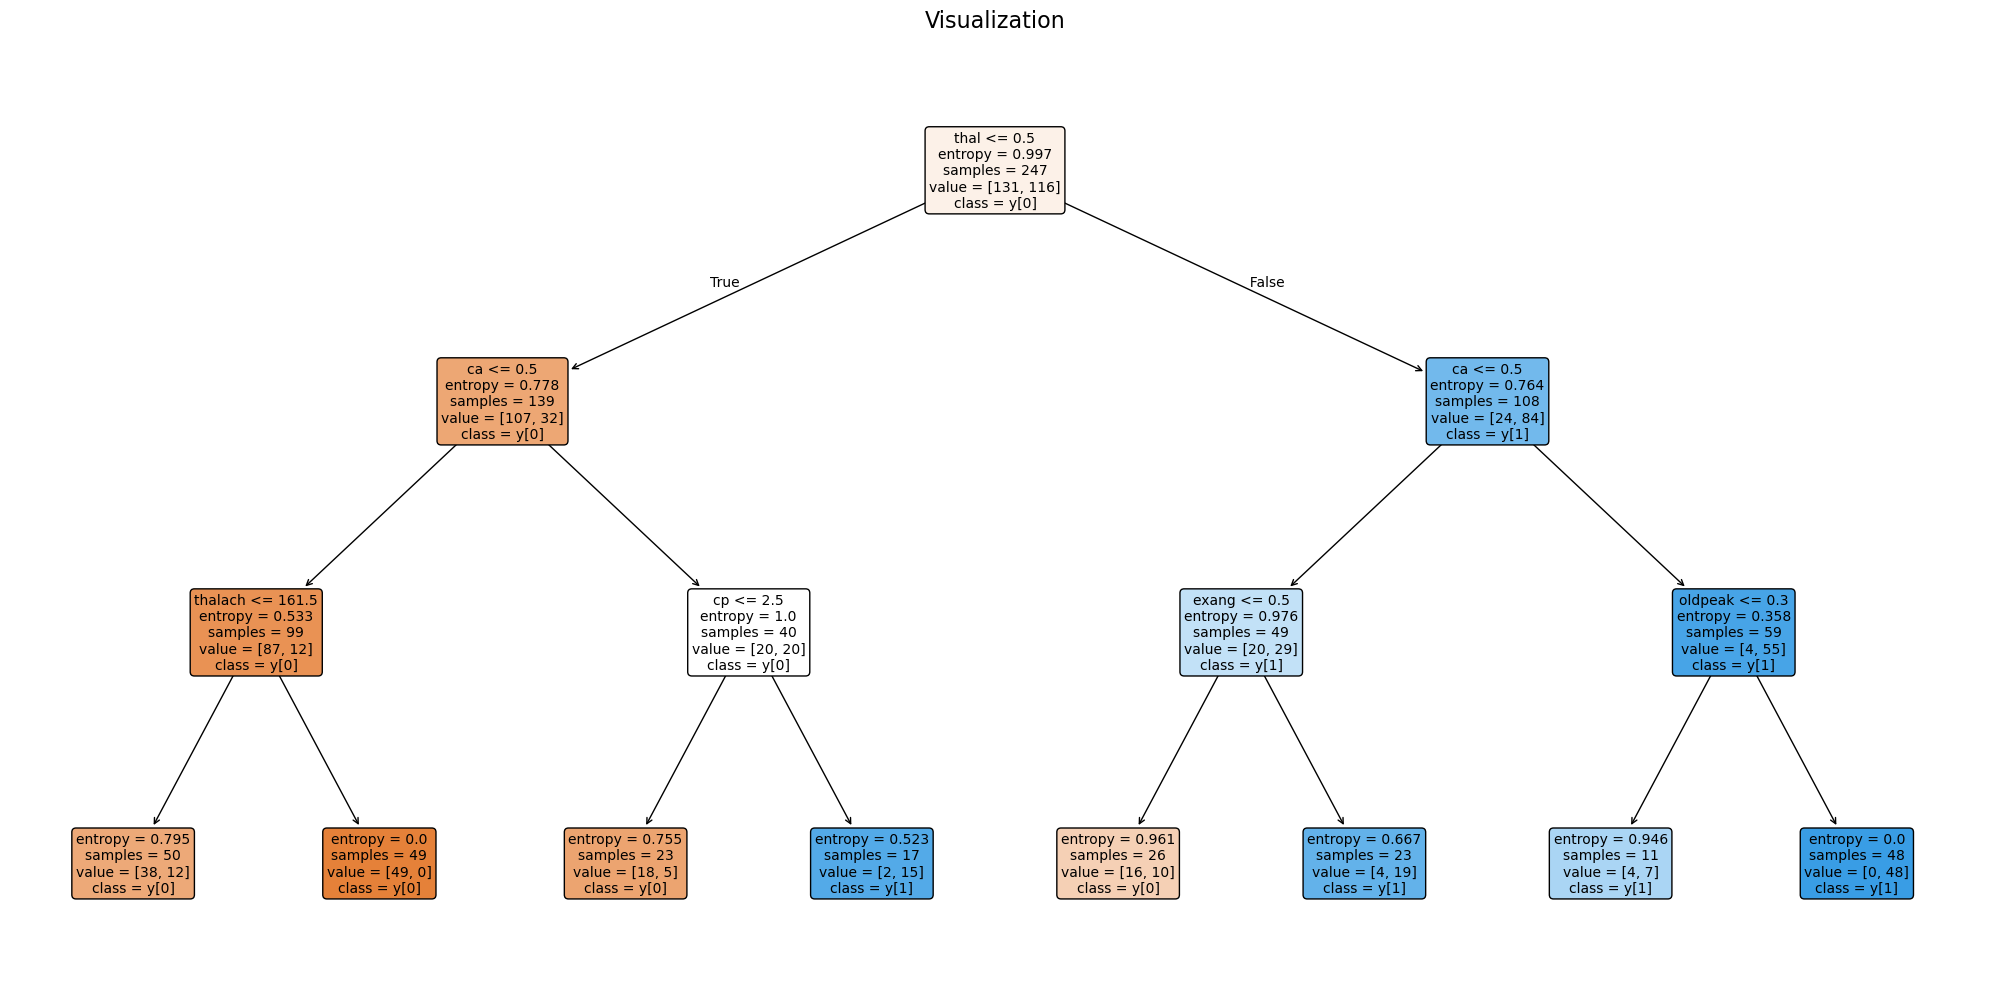

In [19]:
explain_model(model, X_train, X_test, y_train, y_test, features = X_train.columns)

In [175]:
param_dist = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None] + list(range(3, 31)),
    "min_samples_split": randint(3, 51),
    "min_samples_leaf": randint(3, 31),
}

In [180]:
rs = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_dist,
    n_iter=150,             
    scoring="accuracy",
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

In [181]:
rs.fit(X, y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A30E4D26D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A30DFB5010>},
                   random_state=42, scoring='accuracy', verbose=1)

In [182]:
rs.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 23}

In [183]:
model_random= DecisionTreeClassifier(**rs.best_params_)

In [184]:
model_random.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4,
                       min_samples_split=23)

In [185]:
y_pred = model_random.predict(X_test)

In [188]:
accuracy = accuracy_score(y_test, y_pred)

In [190]:
accuracy

0.6666666666666666

Test Results:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68        30
           1       0.68      0.63      0.66        30

    accuracy                           0.67        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.67      0.67      0.67        60

[[21  9]
 [11 19]]
Train Results:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       133
           1       0.86      0.90      0.88       104

    accuracy                           0.89       237
   macro avg       0.89      0.90      0.89       237
weighted avg       0.90      0.89      0.89       237

[[118  15]
 [ 10  94]]
------------------
------------------


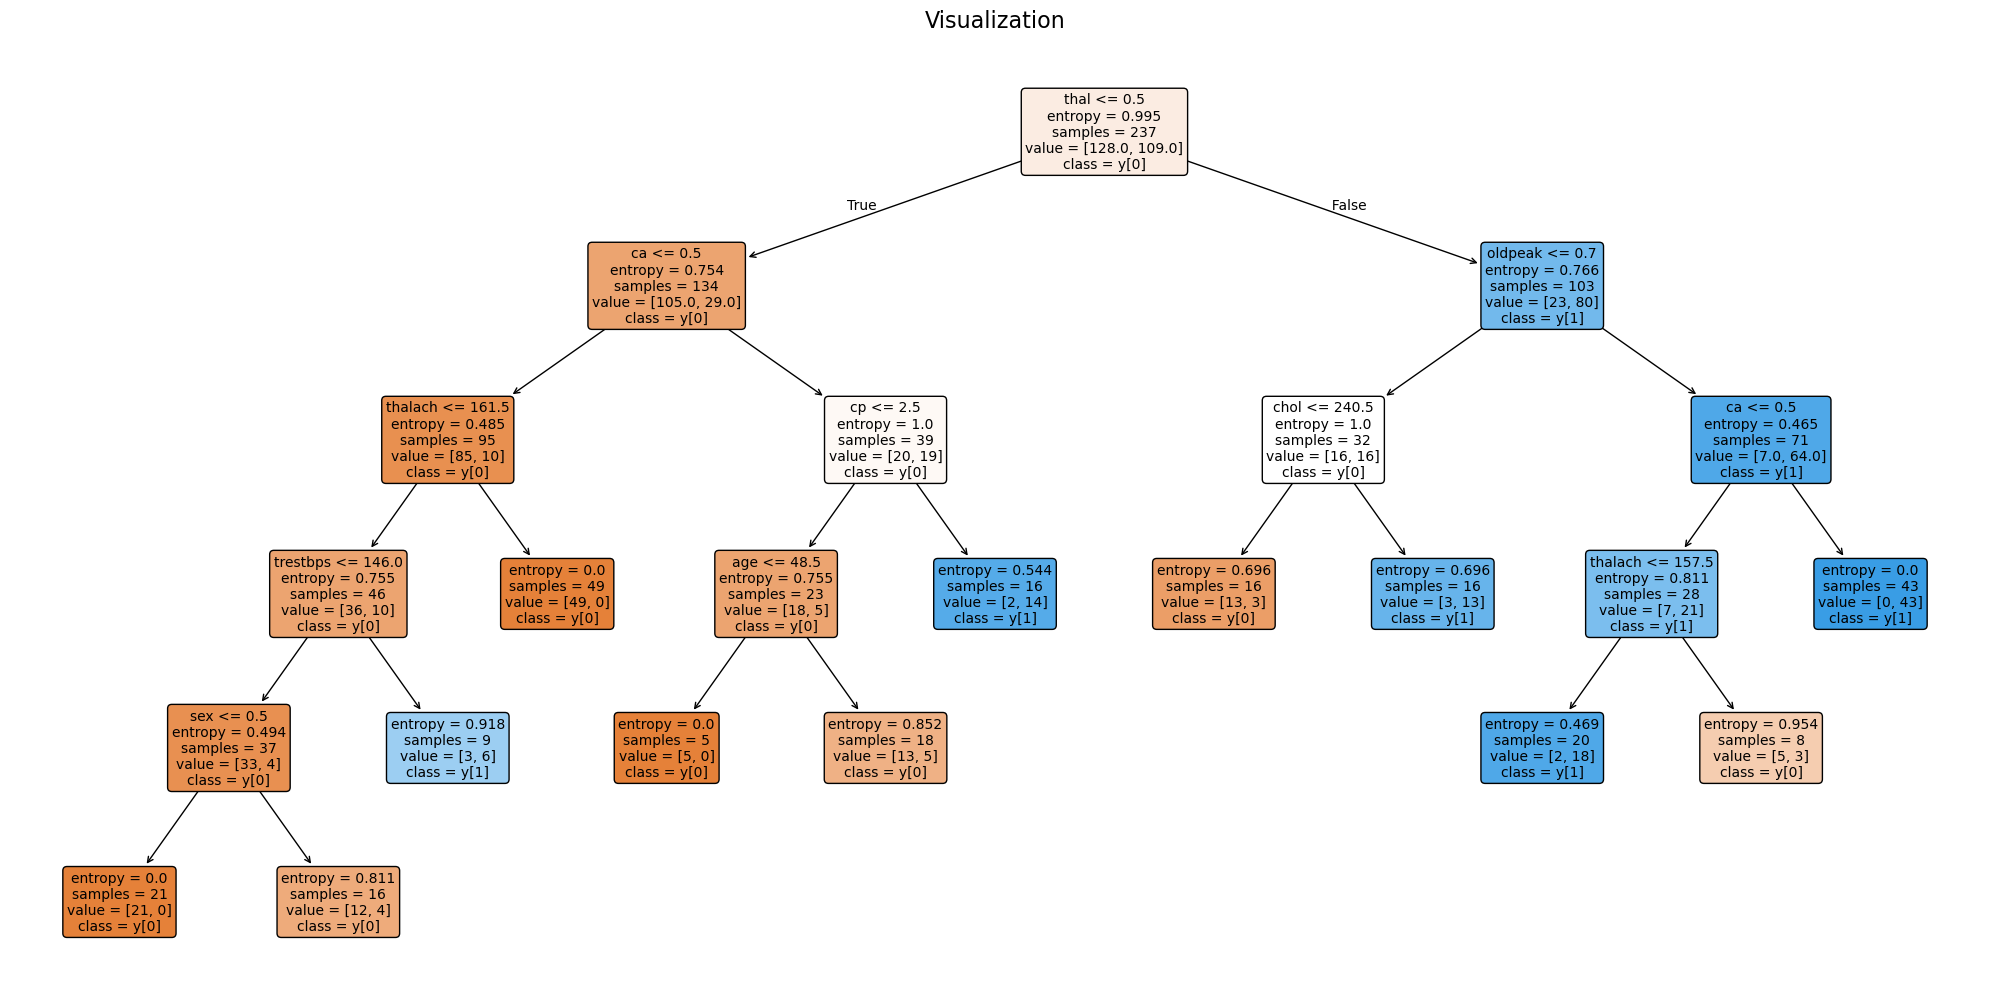

In [191]:
explain_model(model_random, X_train, X_test, y_train, y_test, features=X_train.columns)